In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
# remove first and last two columns
df = df.iloc[:, 1:-2]
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


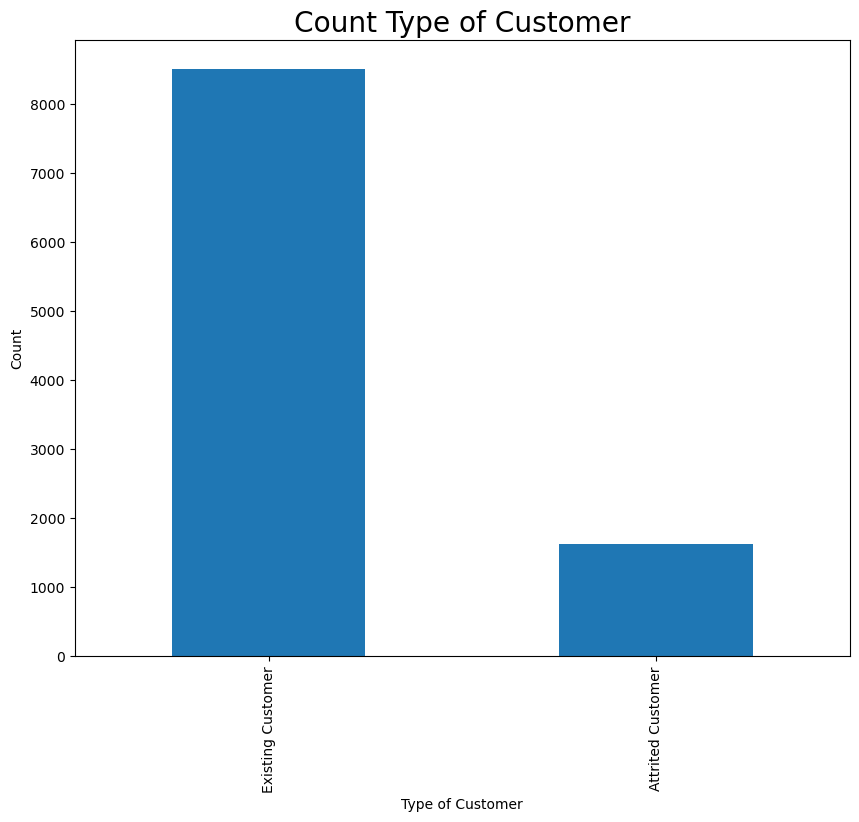

In [9]:
# Type of attrition flag 
# existing and attrited customer 
print(df.Attrition_Flag.value_counts())
plt.figure(figsize=(10,8))
df.Attrition_Flag.value_counts().plot(kind = "bar")
plt.style.use("fivethirtyeight")
plt.title("Count Type of Customer")
plt.xlabel("Type of Customer")
plt.ylabel("Count")
plt.show()
plt.close()


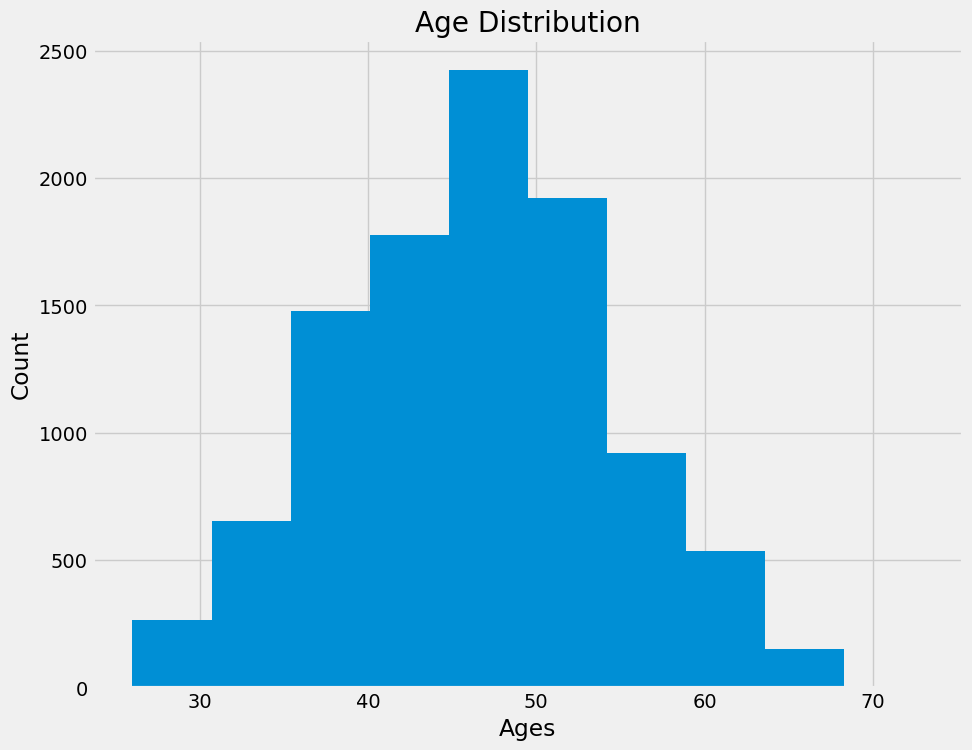

In [10]:
# customer age distribution-histogram
# age is cluster around age 45-55
plt.figure(figsize=(10,8))
df.Customer_Age.plot(kind = "hist")
plt.style.use("seaborn-bright")
plt.title("Age Distribution")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()
plt.close()


F    5358
M    4769
Name: Gender, dtype: int64


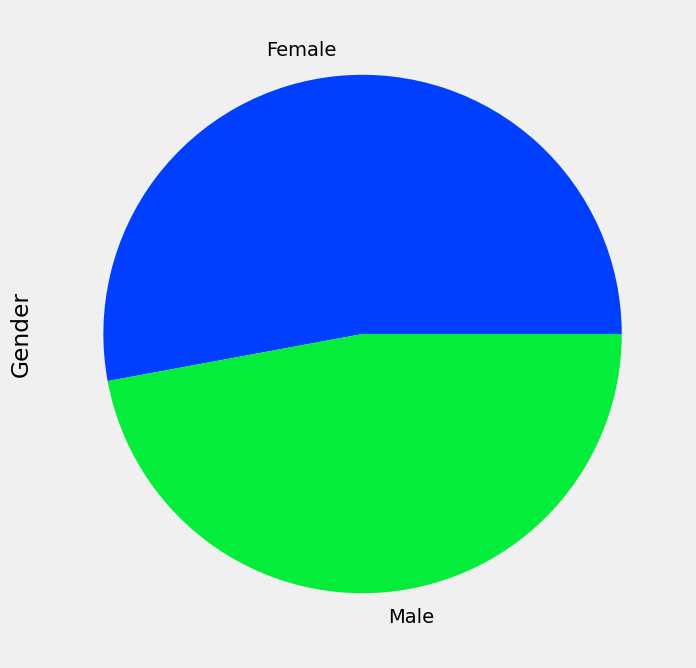

In [11]:
# pie plot - gender counts
print(df.Gender.value_counts())
plt.figure(figsize=(10,8))
df.Gender.value_counts().plot(kind='pie', labels = ["Female", "Male"])
plt.style.use("seaborn-paper")
plt.show()
plt.close()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


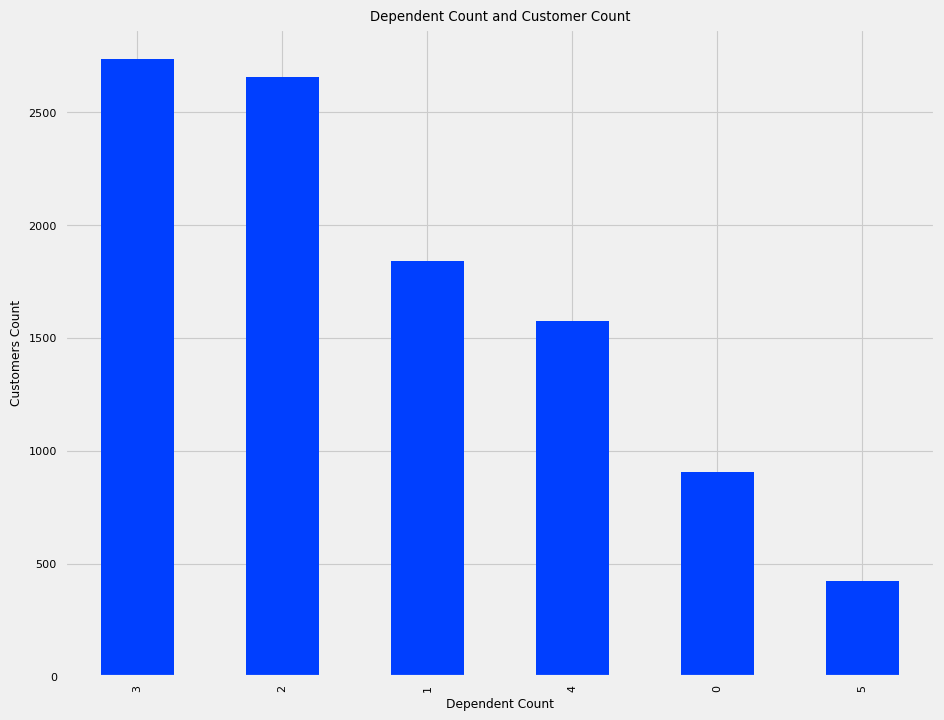

In [12]:
# bar count plot - dependent count 
print(df.Dependent_count.value_counts())
plt.figure(figsize=(10,8))
df.Dependent_count.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Dependent Count and Customer Count")
plt.xlabel("Dependent Count")
plt.ylabel("Customers Count")
plt.show()
plt.close()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


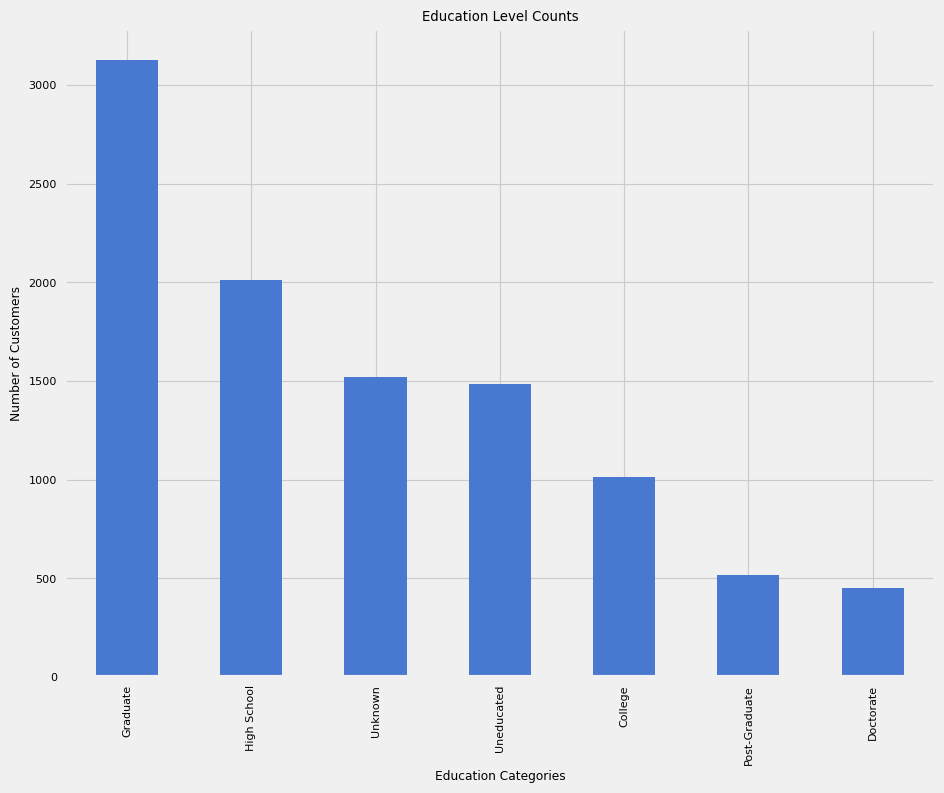

In [13]:
# education level categories counts
print(df.Education_Level.value_counts())
plt.figure(figsize=(10,8))
df.Education_Level.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Education Level Counts")
plt.xlabel("Education Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


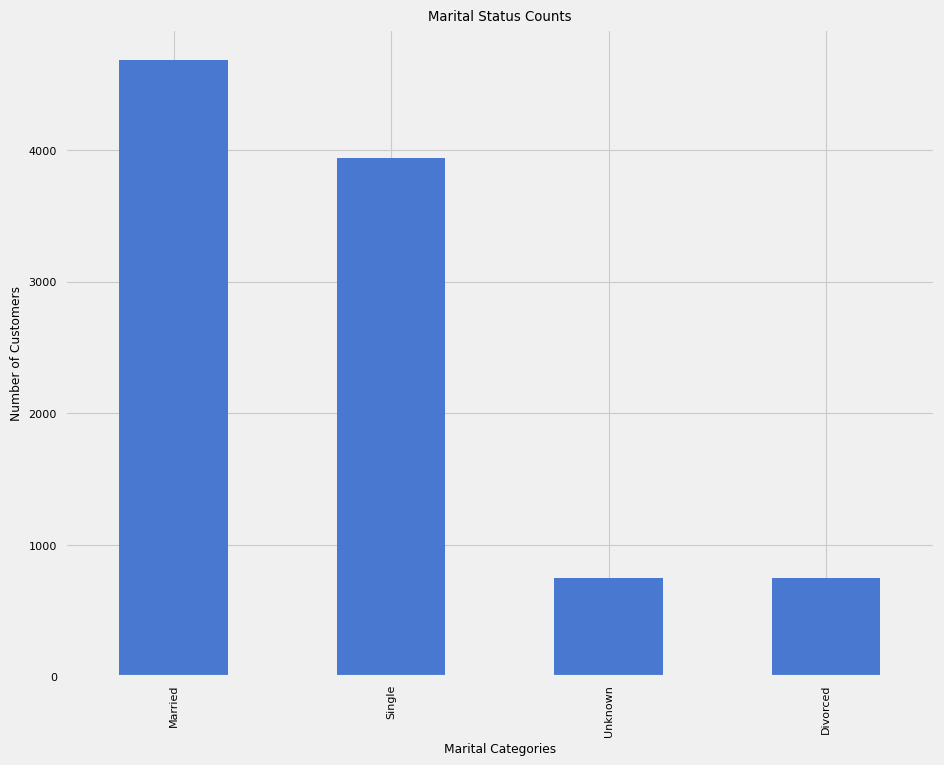

In [14]:
# marital categories counts
print(df.Marital_Status.value_counts())
plt.figure(figsize=(10,8))
df.Marital_Status.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Marital Status Counts")
plt.xlabel("Marital Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


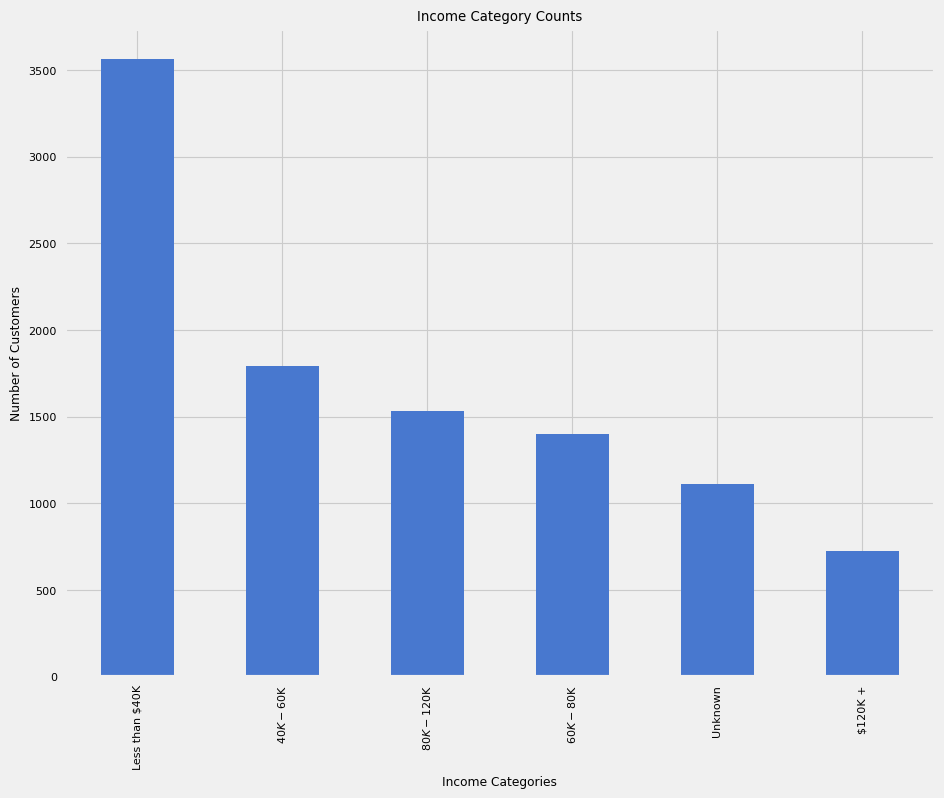

In [15]:
# income category categories counts
print(df.Income_Category.value_counts())
plt.figure(figsize=(10,8))
df.Income_Category.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Income Category Counts")
plt.xlabel("Income Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


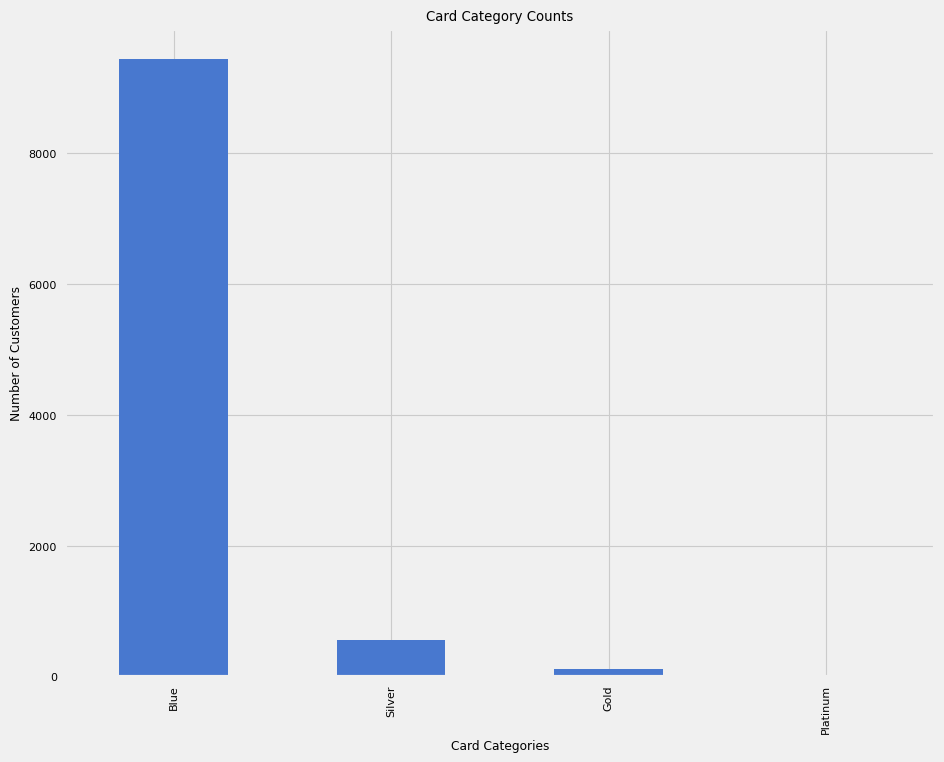

In [16]:
# card category categories counts
print(df.Card_Category.value_counts())
plt.figure(figsize=(10,8))
df.Card_Category.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Card Category Counts")
plt.xlabel("Card Categories")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

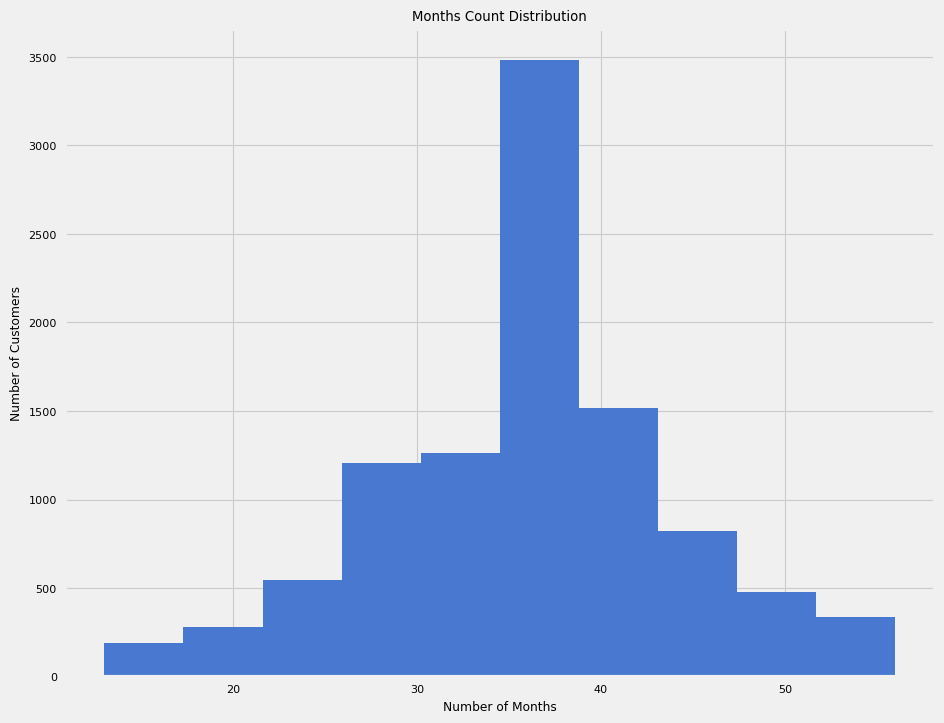

In [17]:
# histogram - number of months customer is in distribution
plt.figure(figsize=(10,8))
df.Months_on_book.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Months Count Distribution")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


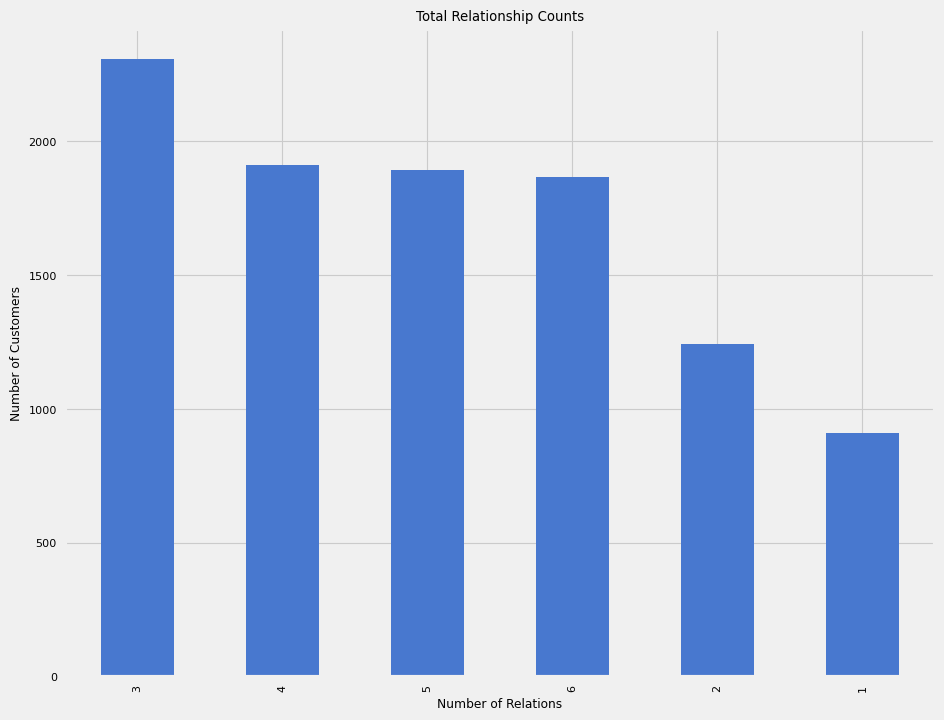

In [18]:
# bar count plot - total relationship count plot
print(df.Total_Relationship_Count.value_counts())
plt.figure(figsize=(10,8))
df.Total_Relationship_Count.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Total Relationship Counts")
plt.xlabel("Number of Relations")
plt.ylabel("Number of Customers")
plt.show()
plt.close()


3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64


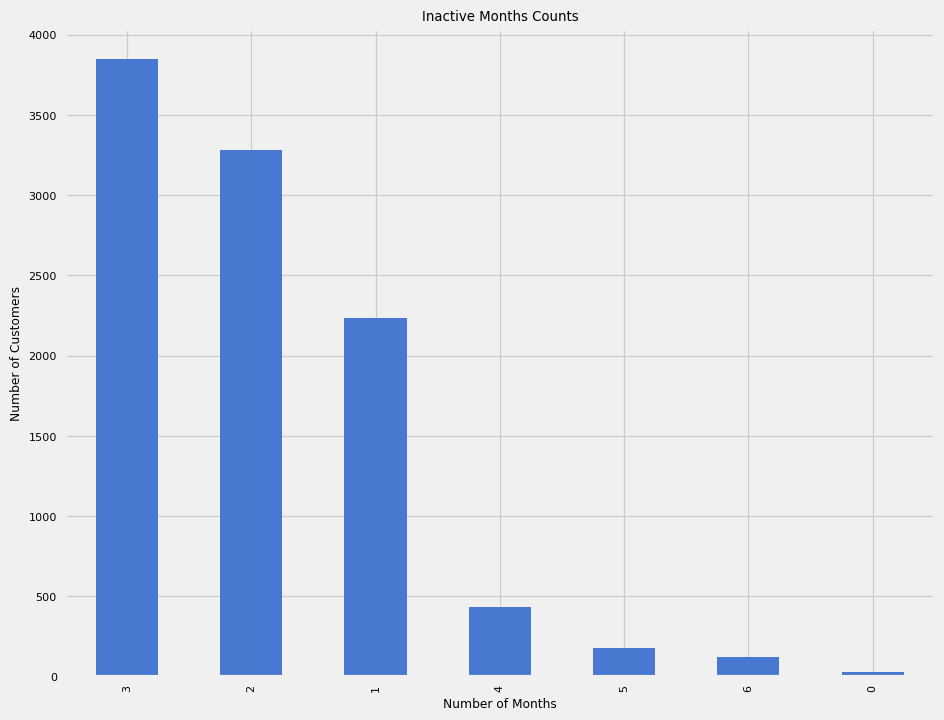

In [19]:
# bar count - inactive 12 months count
print(df.Months_Inactive_12_mon.value_counts())
plt.figure(figsize=(10,8))
df.Months_Inactive_12_mon.value_counts().plot(kind = "bar")
plt.style.use("seaborn-muted")
plt.title("Inactive Months Counts")
plt.xlabel("Number of Months")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

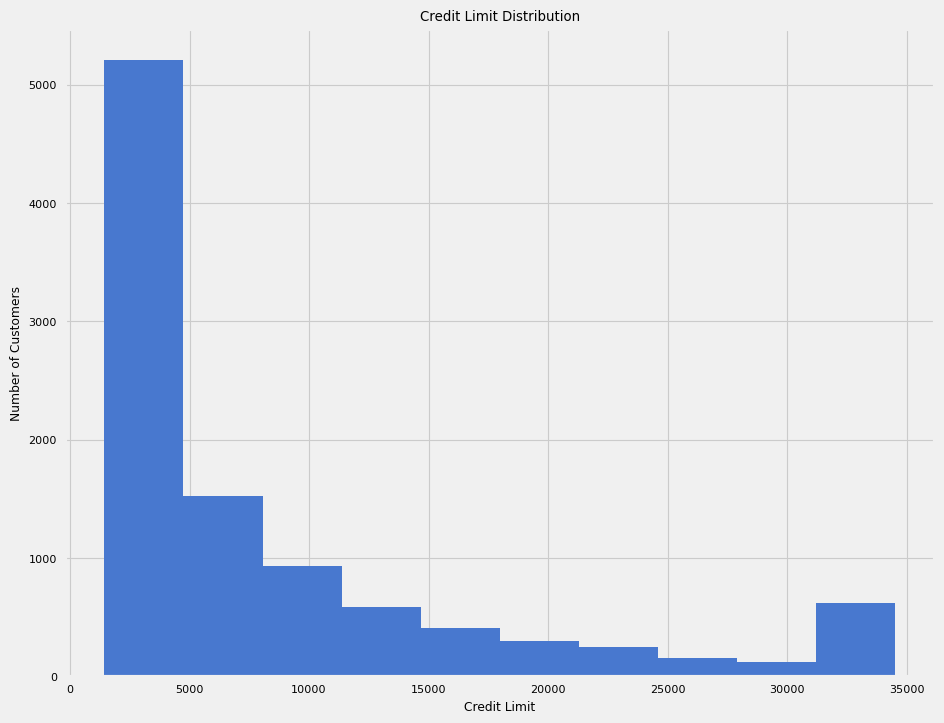

In [20]:
# histogram - credit limit distribution
plt.figure(figsize=(10,8))
df.Credit_Limit.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Credit Limit Distribution")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

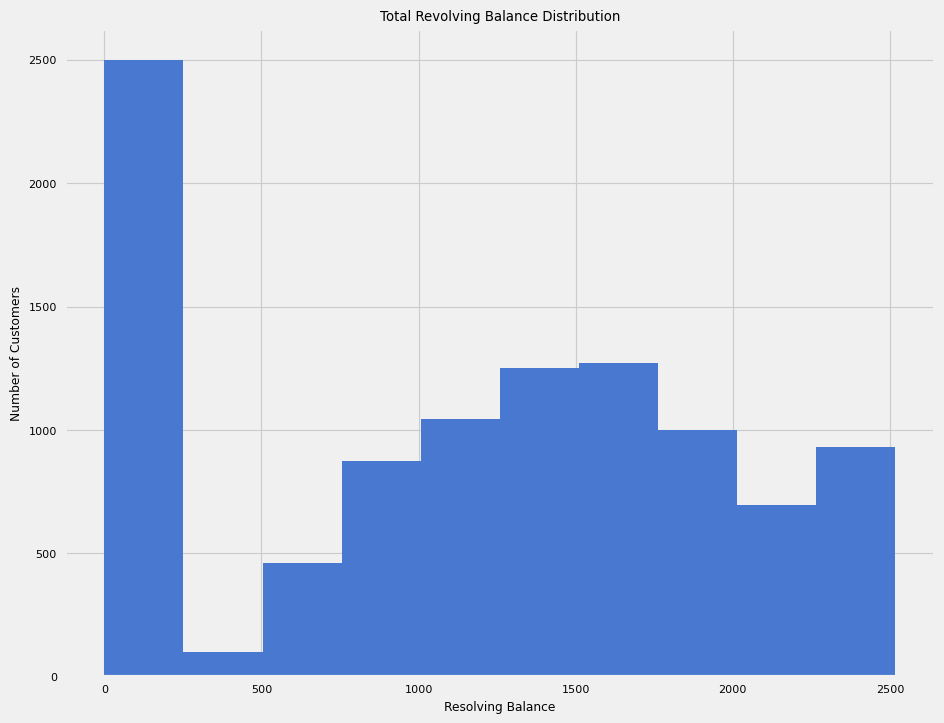

In [21]:
# histogram - total revolving balance distribution
plt.figure(figsize=(10,8))
df.Total_Revolving_Bal.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Total Revolving Balance Distribution")
plt.xlabel("Resolving Balance")
plt.ylabel("Number of Customers")
plt.show()
plt.close()


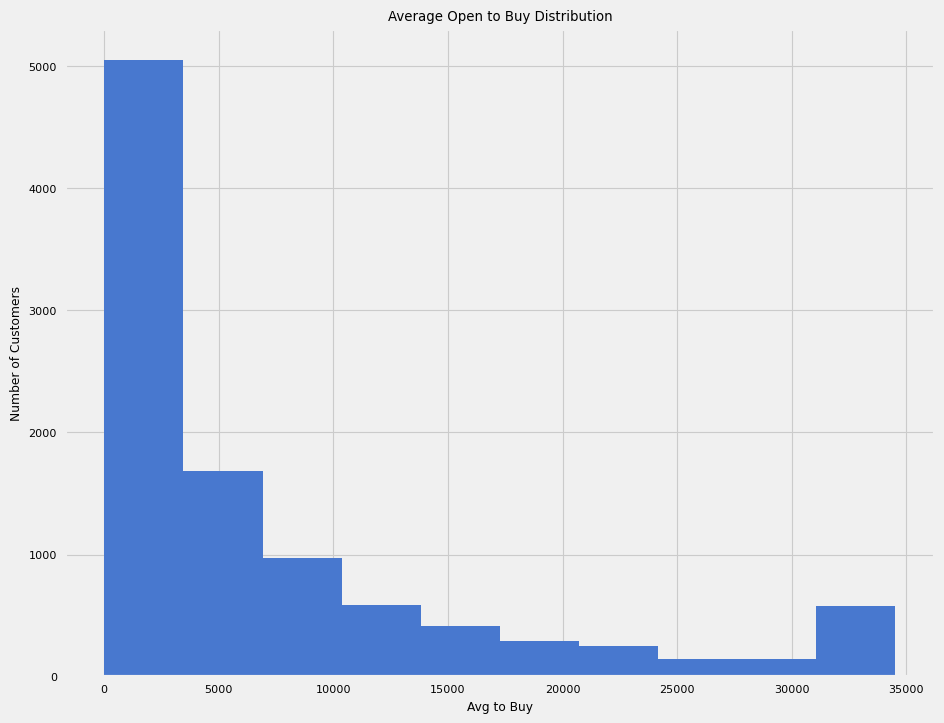

In [22]:
# histogram - average open to buy distribution
plt.figure(figsize=(10,8))
df.Avg_Open_To_Buy.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Average Open to Buy Distribution")
plt.xlabel("Avg to Buy")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

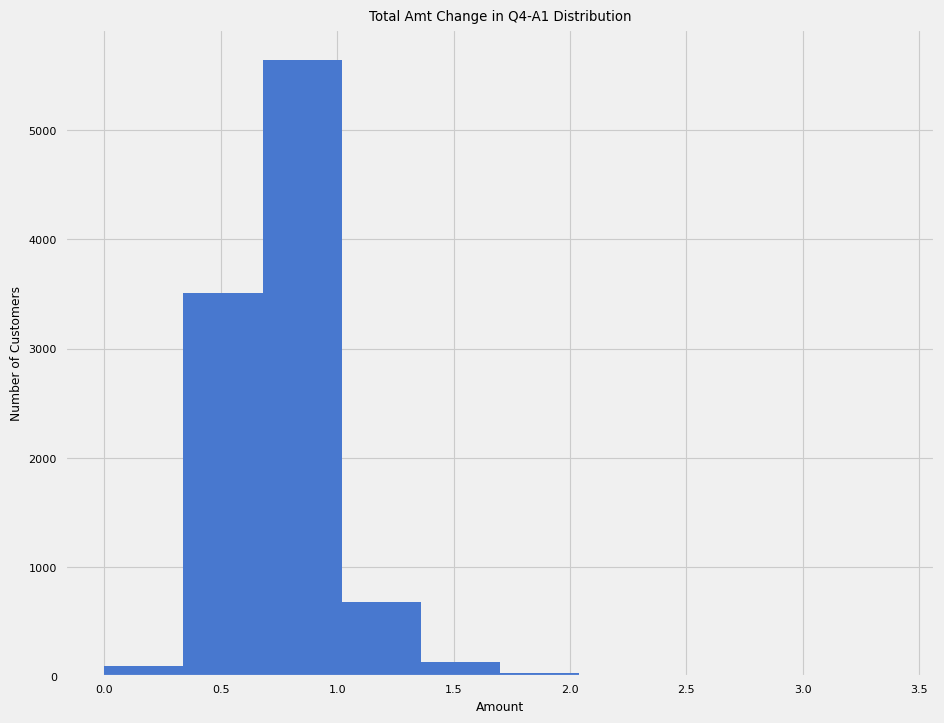

<function matplotlib.pyplot.close(fig=None)>

In [23]:
# histogram - total amount change in q4-q1 distribution
plt.figure(figsize=(10,8))
df.Total_Amt_Chng_Q4_Q1.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Total Amt Change in Q4-A1 Distribution")
plt.xlabel("Amount")
plt.ylabel("Number of Customers")
plt.show()
plt.close

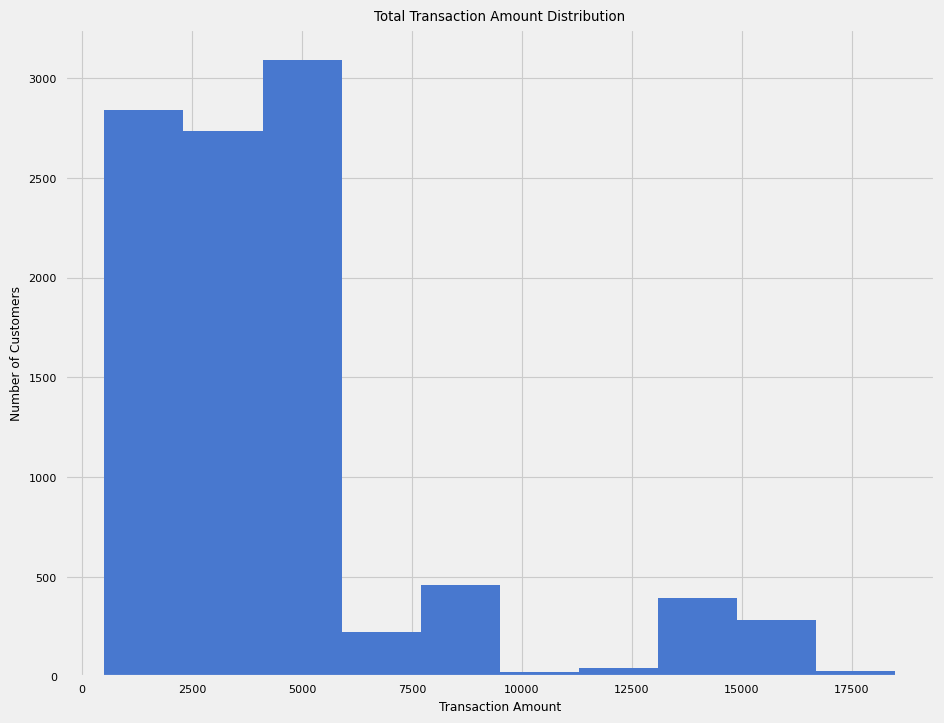

In [24]:
# histogram - total transaction amount distribution
plt.figure(figsize=(10,8))
df.Total_Trans_Amt.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Total Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Customers")
plt.show()
plt.close()


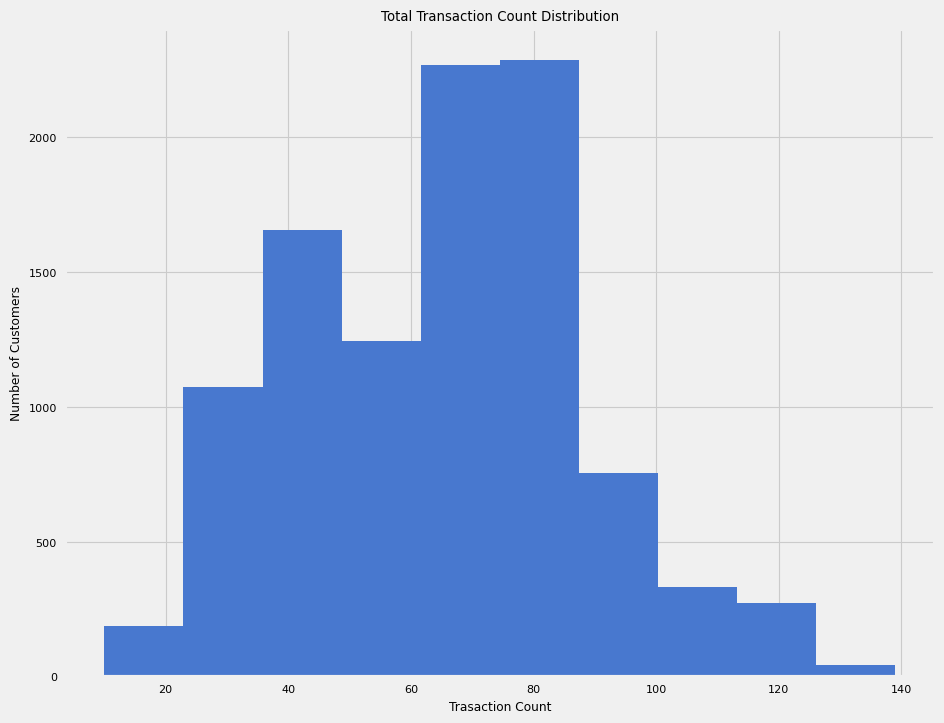

In [25]:
# histogram - total transaction count distribution
plt.figure(figsize=(10,8))
df.Total_Trans_Ct.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Total Transaction Count Distribution")
plt.xlabel("Trasaction Count")
plt.ylabel("Number of Customers")
plt.show()
plt.close()


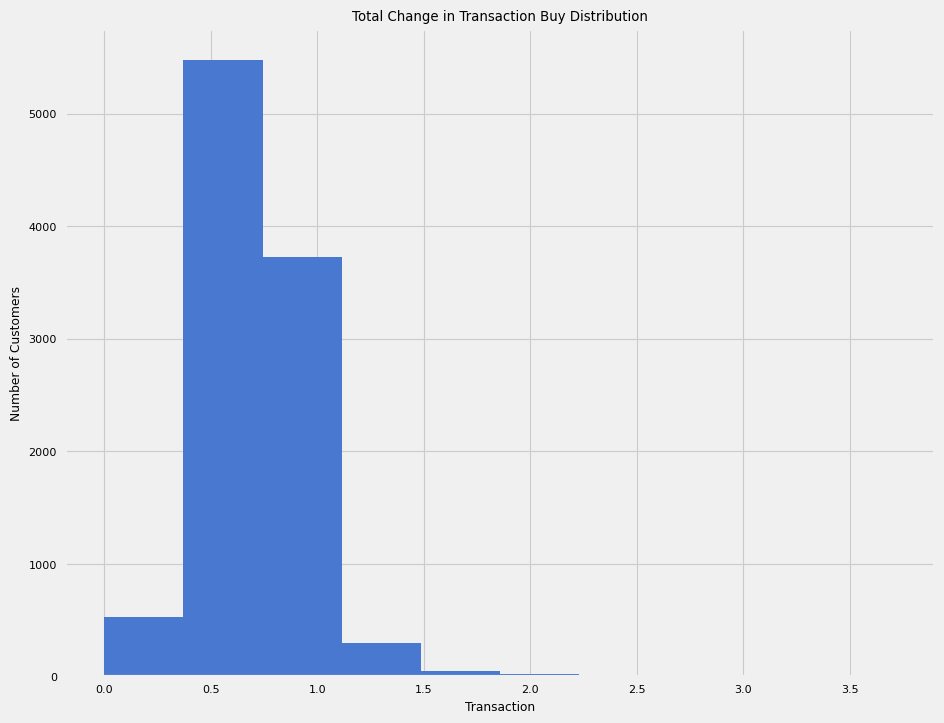

In [26]:
# histogram - change in transaction distribution
plt.figure(figsize=(10,8))
df.Total_Ct_Chng_Q4_Q1.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Total Change in Transaction Buy Distribution")
plt.xlabel("Transaction")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

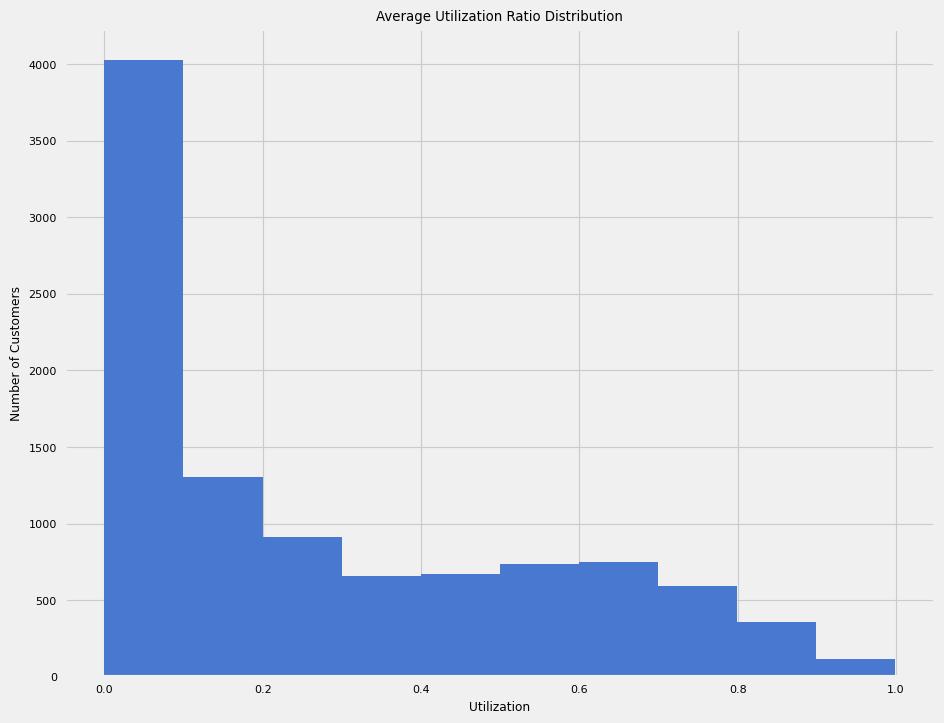

In [27]:
# histogram - average utilization ratio distribution
plt.figure(figsize=(10,8))
df.Avg_Utilization_Ratio.plot(kind = "hist")
plt.style.use("seaborn-muted")
plt.title("Average Utilization Ratio Distribution")
plt.xlabel("Utilization")
plt.ylabel("Number of Customers")
plt.show()
plt.close()

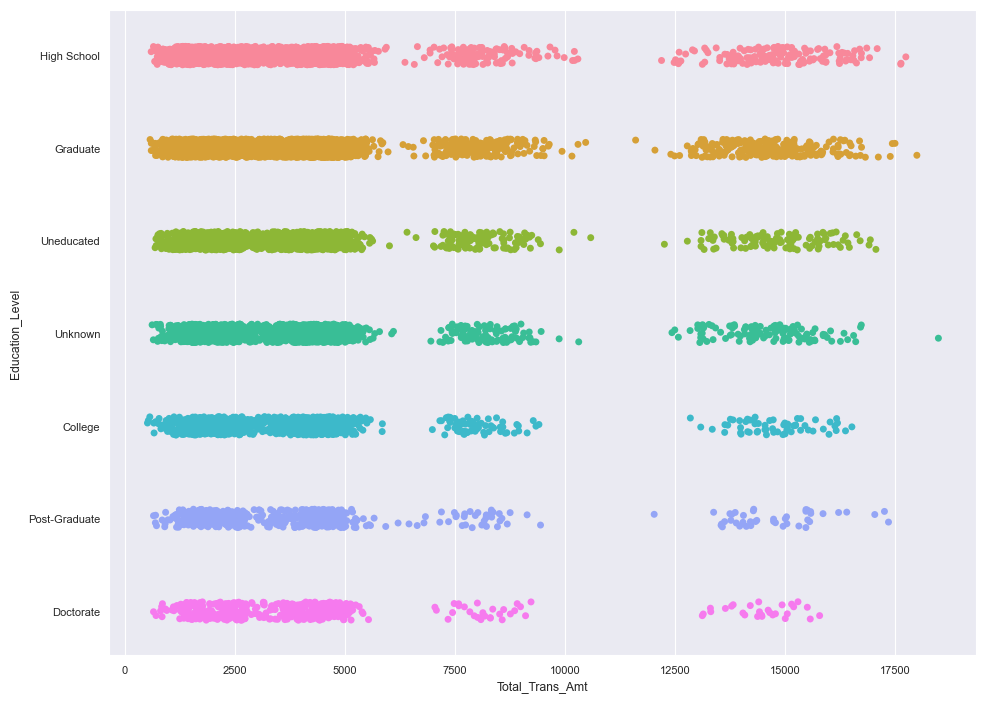

In [28]:
# stripplot
# two gaps in total transaction amount between 5000 - 7000 and 10000-12500 for all education level customers
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.stripplot(data =df, x="Total_Trans_Amt", y = "Education_Level")
plt.show()
plt.close()

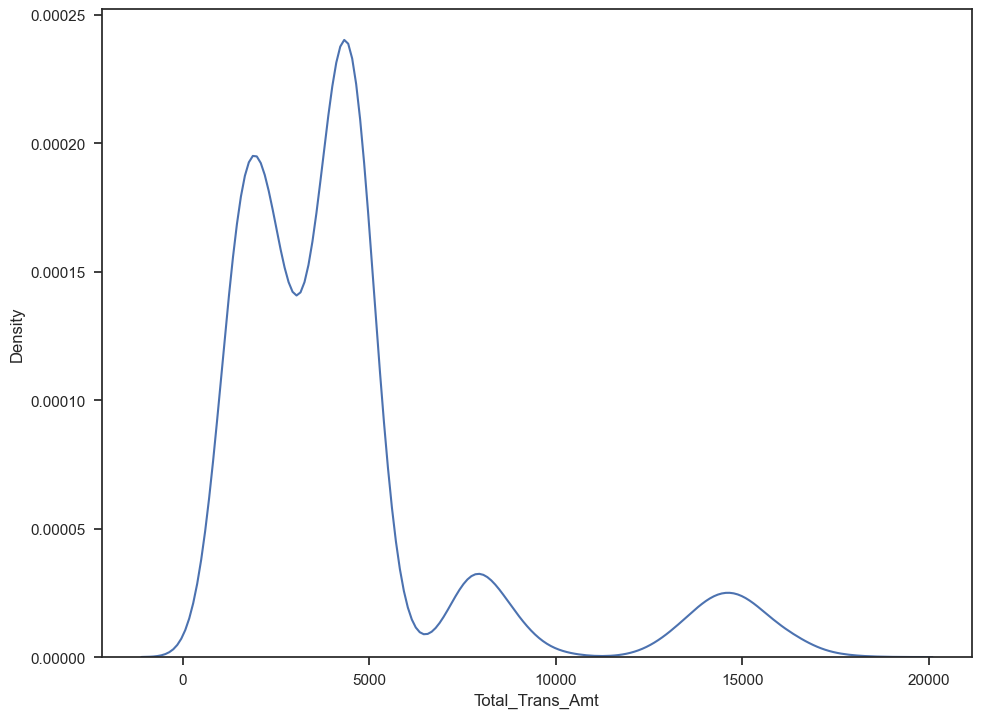

In [29]:
# kdeplot
# we can see distribution of total transaction amount is falling in 0 to 5000 more
sns.set_theme(style = "ticks")
plt.figure(figsize=(10,8))
sns.kdeplot(df.Total_Trans_Amt)
plt.show()
plt.close()

Average Transaction Amount : 4404.086303939963


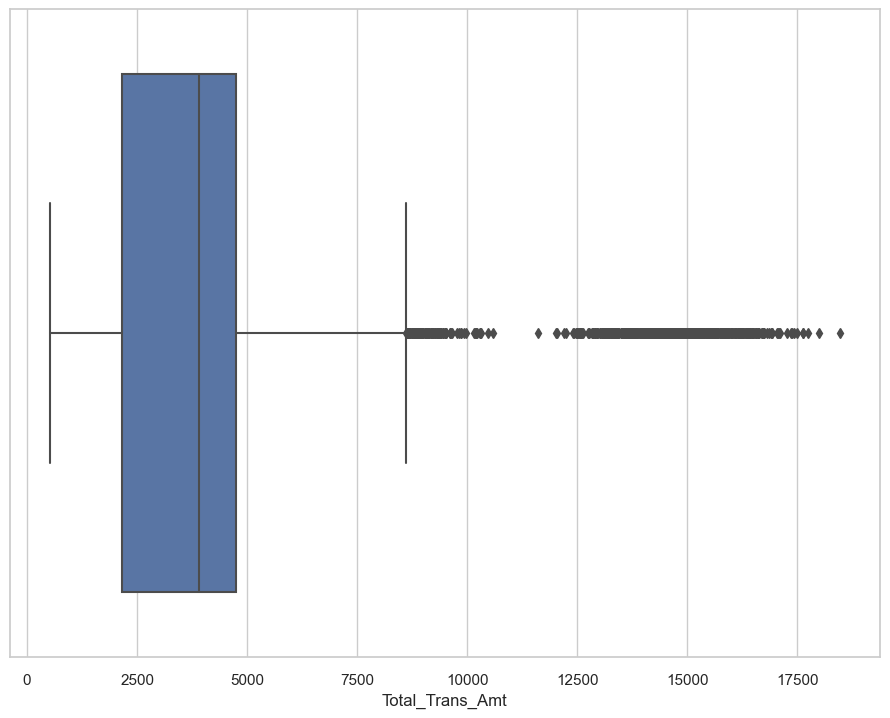

In [30]:
# boxplot
# the transaction amount is left-skewed Mean < Median < Mode
# with outliers amounts
print("Average Transaction Amount : {}".format(df.Total_Trans_Amt.mean()))
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = "Total_Trans_Amt")
plt.show()
plt.close()

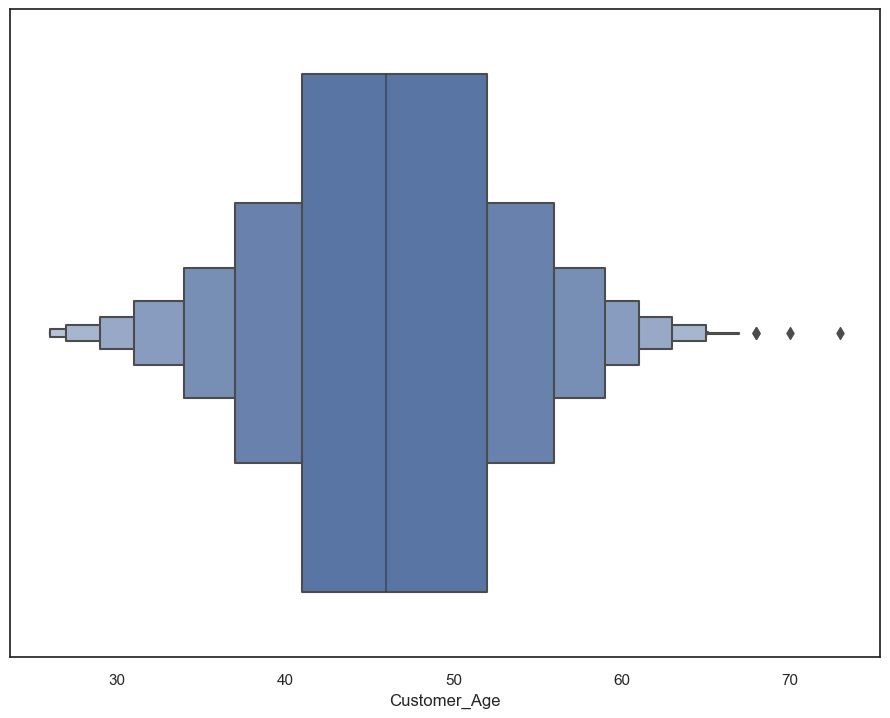

In [31]:
# boxenplot
# customer age is right skewed means Mode < Median < Mean with few outliers
sns.set_style("white")
plt.figure(figsize=(10,8))
sns.boxenplot(data =df, x = "Customer_Age")
plt.show()
plt.close()

In [35]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


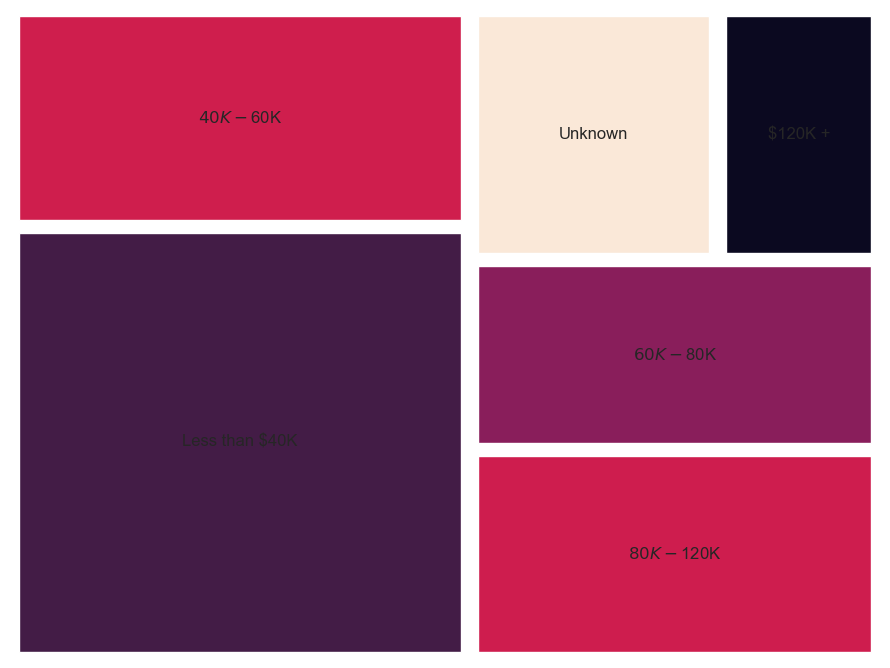

In [36]:
import squarify 
labels = df.Income_Category.value_counts().index
data = df.Income_Category.value_counts().values
plt.figure(figsize=(10,8))
squarify.plot(sizes = data, label = labels, pad = True)
plt.axis('off')
plt.show()
plt.close()

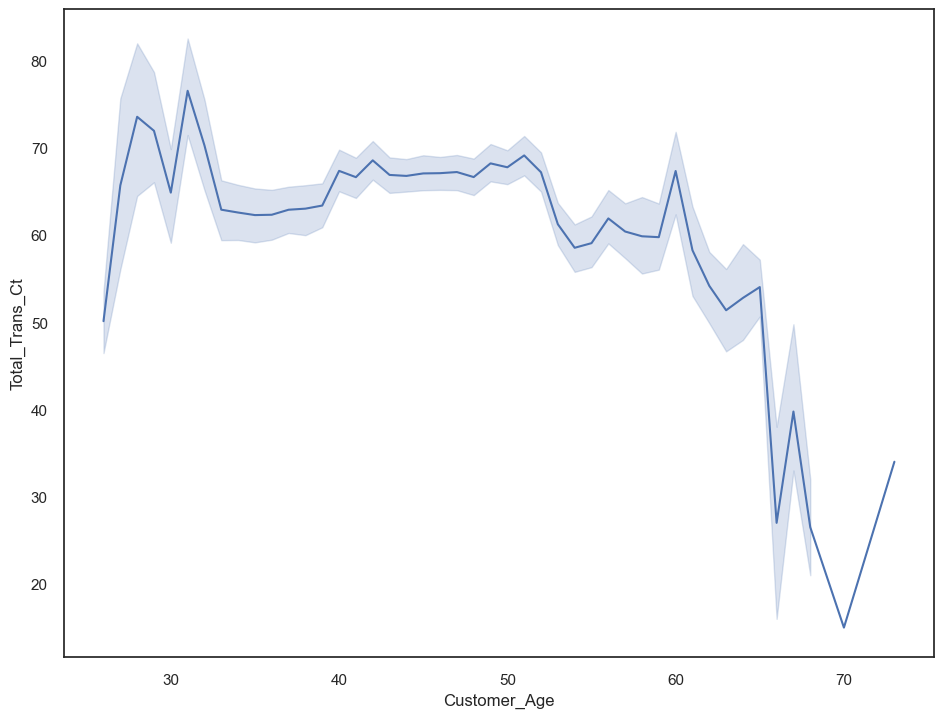

In [37]:
# lineplot - customer age and total transaction amount
# comparing age feature and total transaction relation
# after age 60 number of transactions is decreasing
# 25 to 35 age number of transaction is at peak
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Ct')
plt.show()
plt.close()

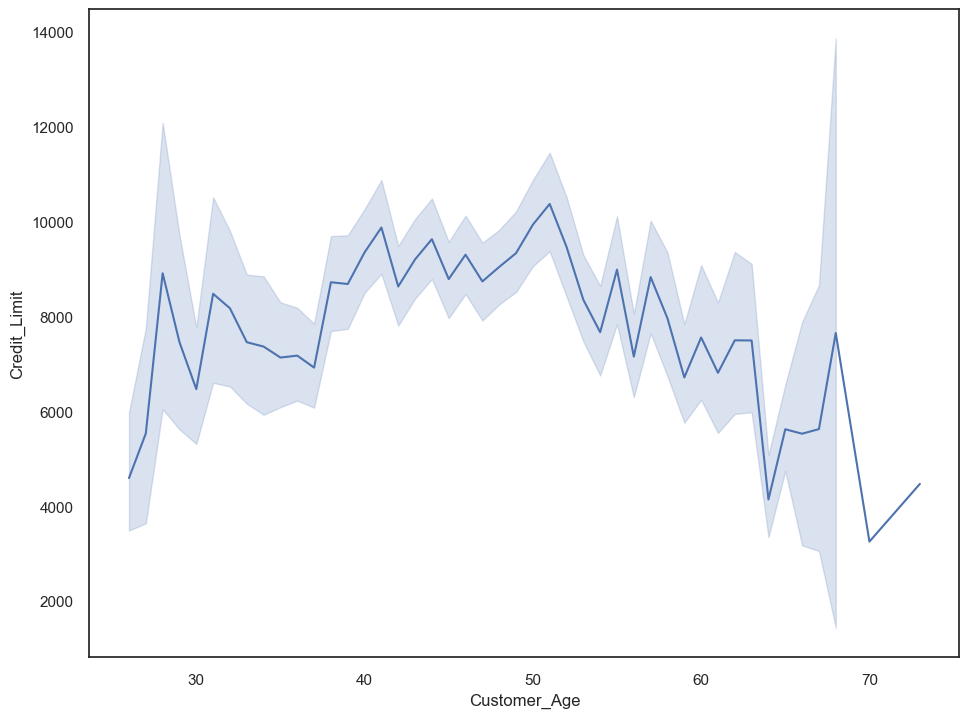

In [38]:
# lineplot - customer age and credit limit
# credit limit is high between age of 40 to 50 
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Credit_Limit', palette = "Spectral")
plt.show()
plt.close()

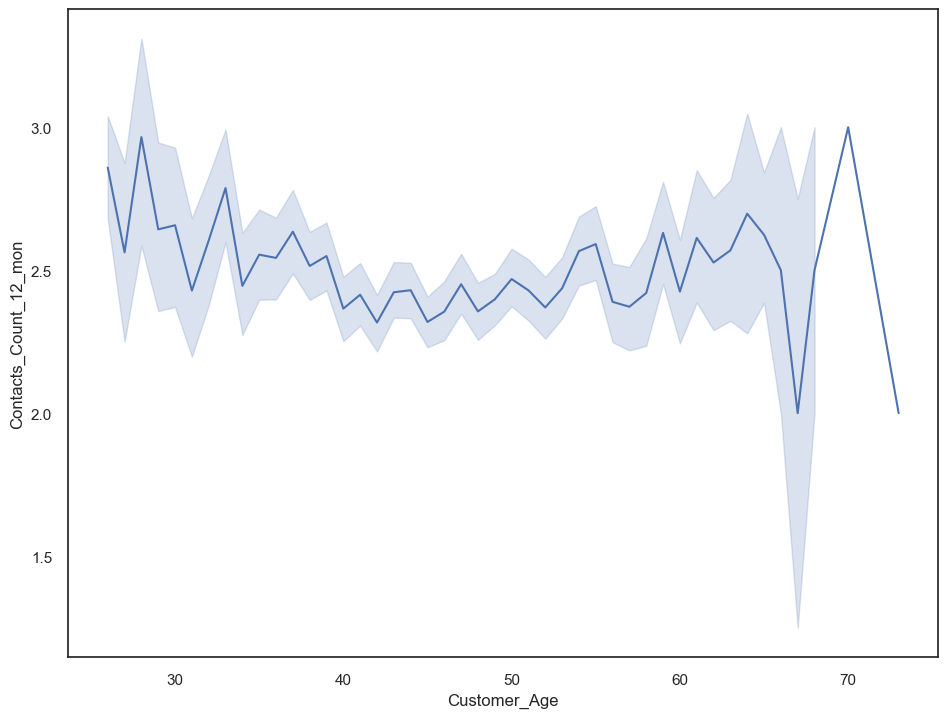

In [40]:
# lineplot - customer age and contacts count in 12 months
# initial 3-4 years and last 3-4 years are when customer contacts bank more 
plt.figure(figsize=(10,8))
sns.lineplot(data =df, x = 'Customer_Age', y = 'Contacts_Count_12_mon')
plt.show()
plt.close()

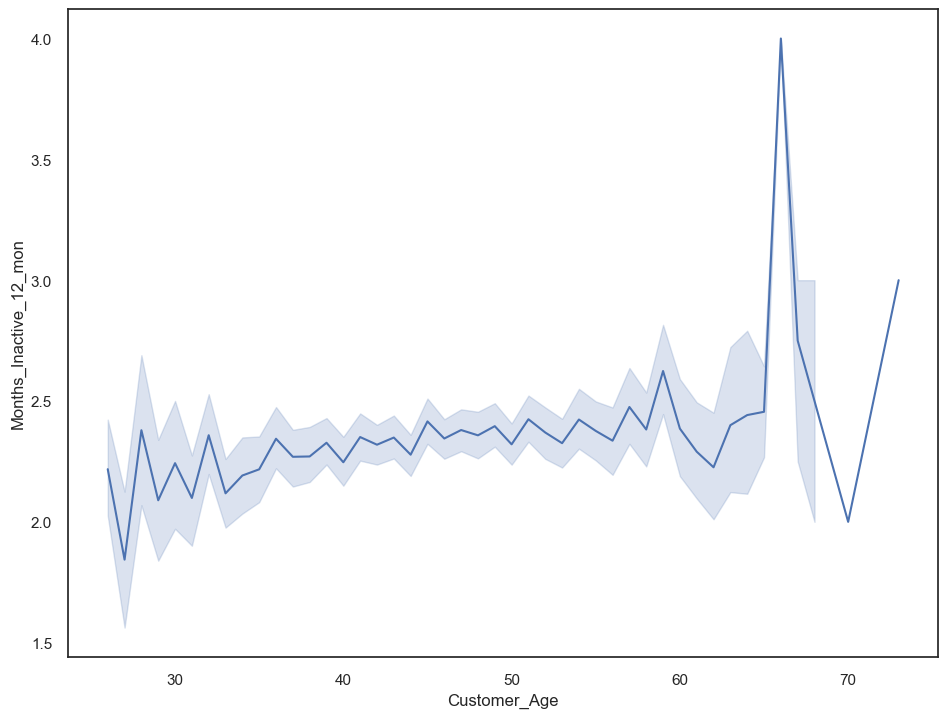

In [41]:
# lineplot - customer age and months inactive 12 mon
# as age increasing the number of inactive months are increasing
plt.figure(figsize=(10,8))
sns.lineplot(data =df, x = 'Customer_Age', y = 'Months_Inactive_12_mon')
plt.show()
plt.close()

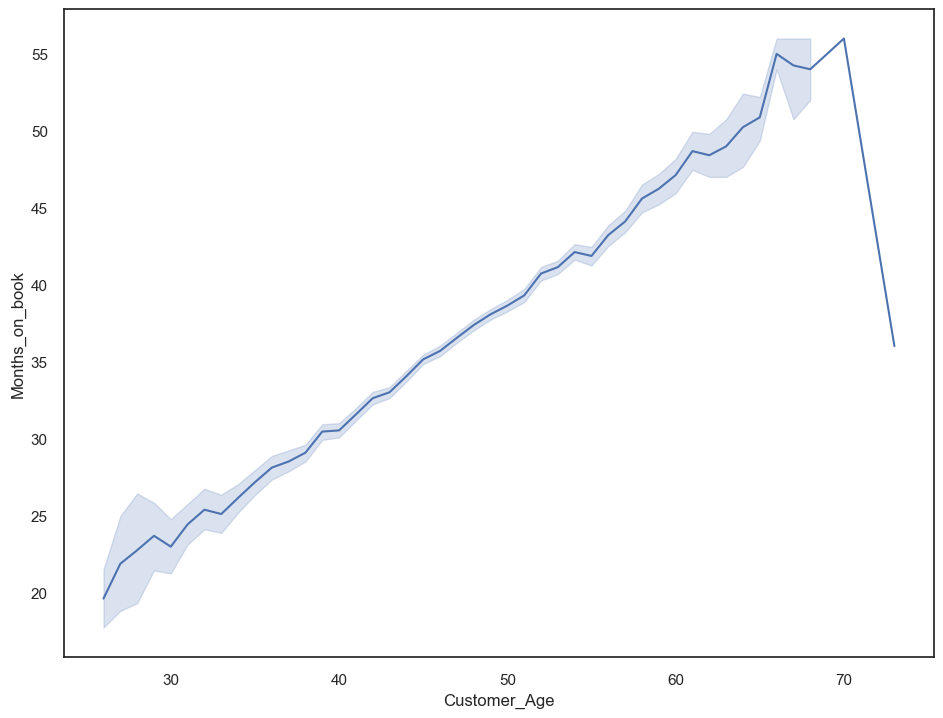

In [42]:
# lineplot - customer age and months of book
# period of relationship with bank increases as age 
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Months_on_book')
plt.show()
plt.close()

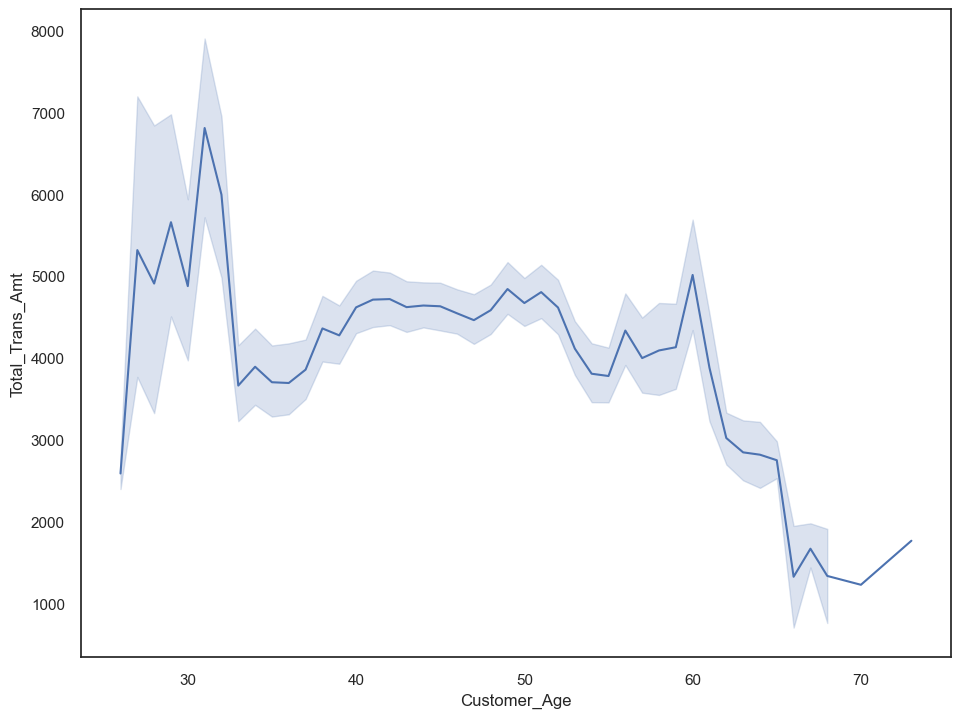

In [43]:
# lineplot - customer age and total transaction amount
# initially transaction amount is high.
# it is stable in 40-50 age
# it declines after 60 age
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Amt')
plt.show()
plt.close()

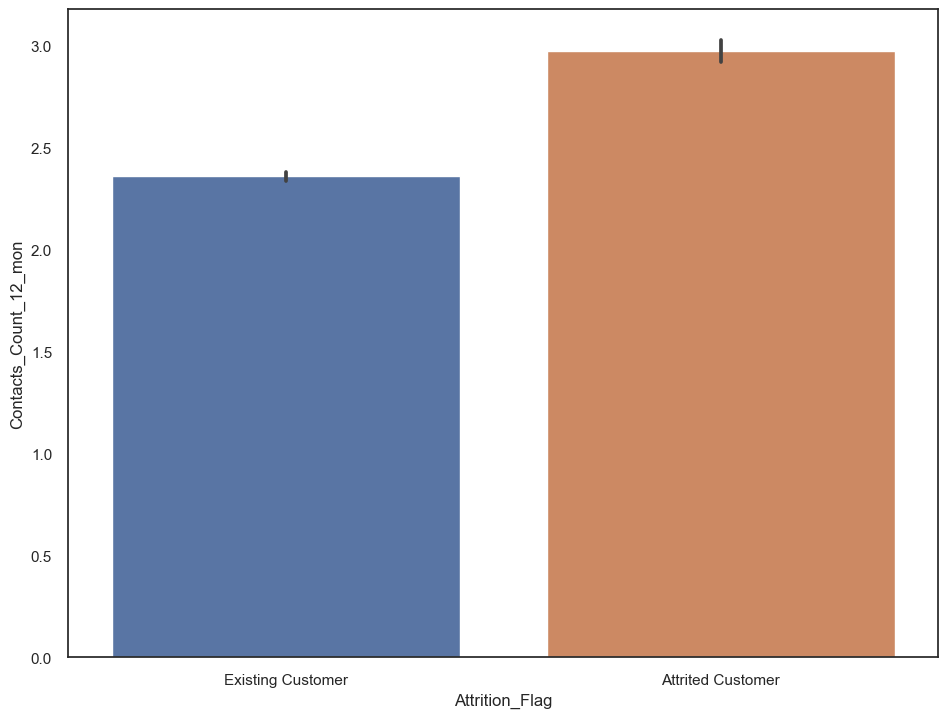

In [44]:
# bar plot - attrited flag and contacts count 12 mon
# existing and attrited customer with contact count in 12 months
plt.figure(figsize=(10,8))
sns.barplot(data = df, x = 'Attrition_Flag', y = 'Contacts_Count_12_mon',)
plt.show()
plt.close()

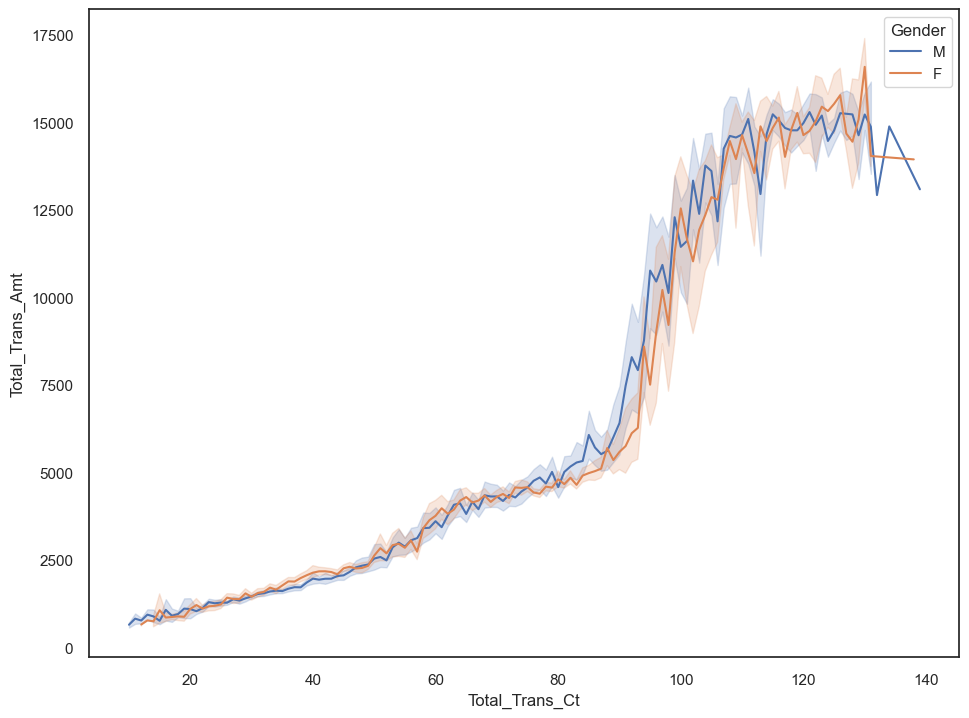

In [46]:
# lineplot - total transaction amount and total transaction count with gender
# no difference in spending of money while considering gender
plt.figure(figsize=(10,8))
sns.lineplot(data = df, y = 'Total_Trans_Amt', x = 'Total_Trans_Ct', hue = 'Gender')
plt.show()
plt.close()


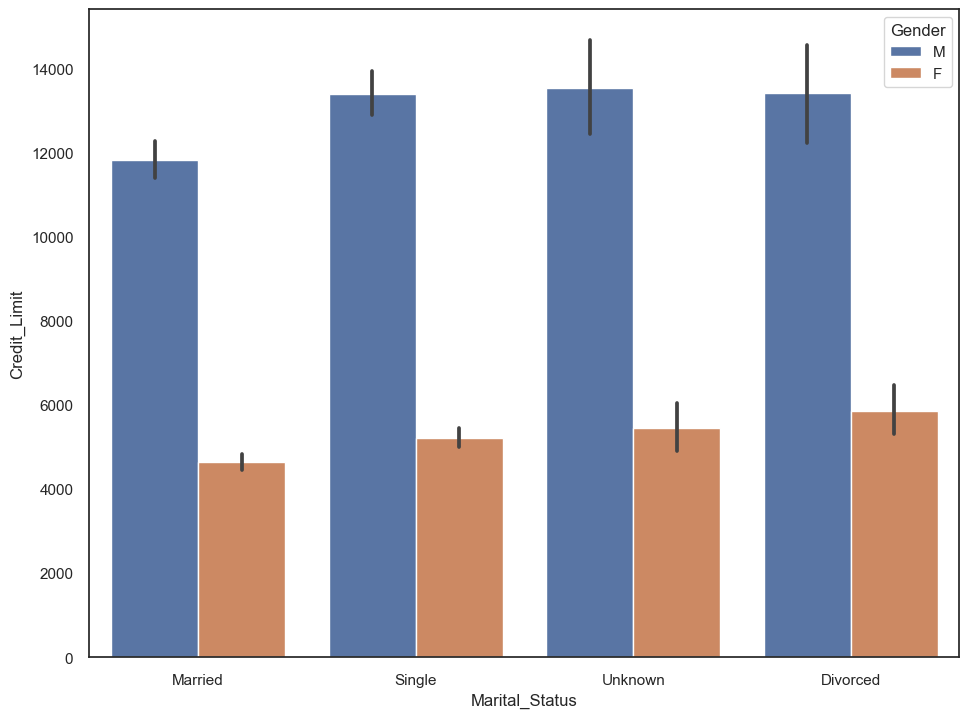

In [47]:
# barplot - marital status, credit limit and gender
# in all marital status the number of female count is less and credit limit is more to male and less to female
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Marital_Status',y = 'Credit_Limit',hue = 'Gender')
plt.show()
plt.close()

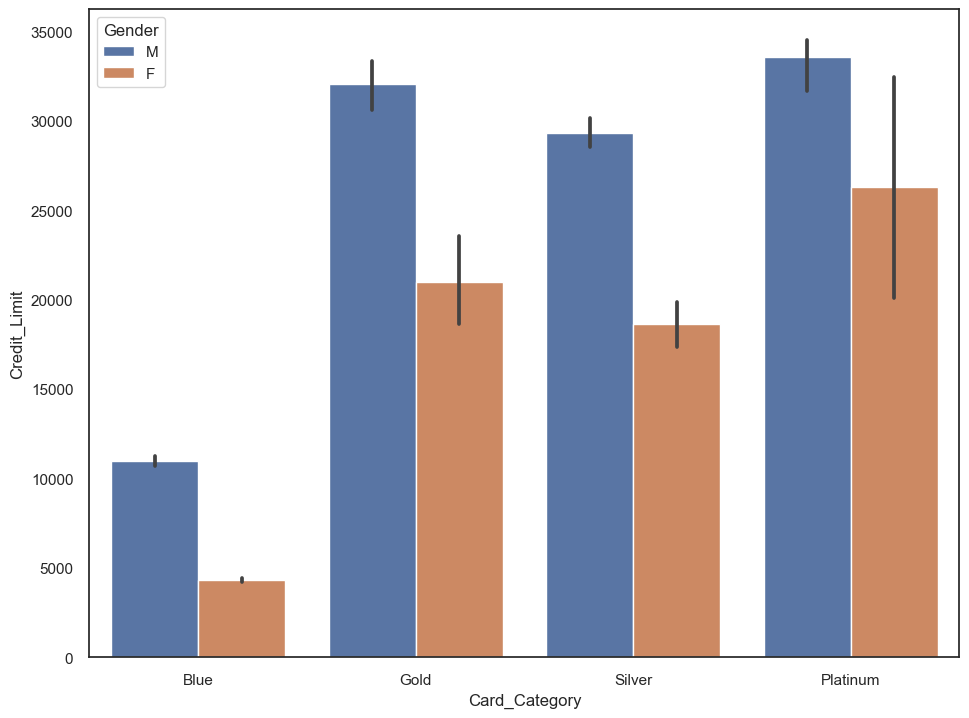

In [48]:
# barplot card category, credit limit and gender
# customers holding gold, silver and platinum more than blue
# still credit limit is less for female
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Card_Category',y = 'Credit_Limit',hue = 'Gender')
plt.show()
plt.close()

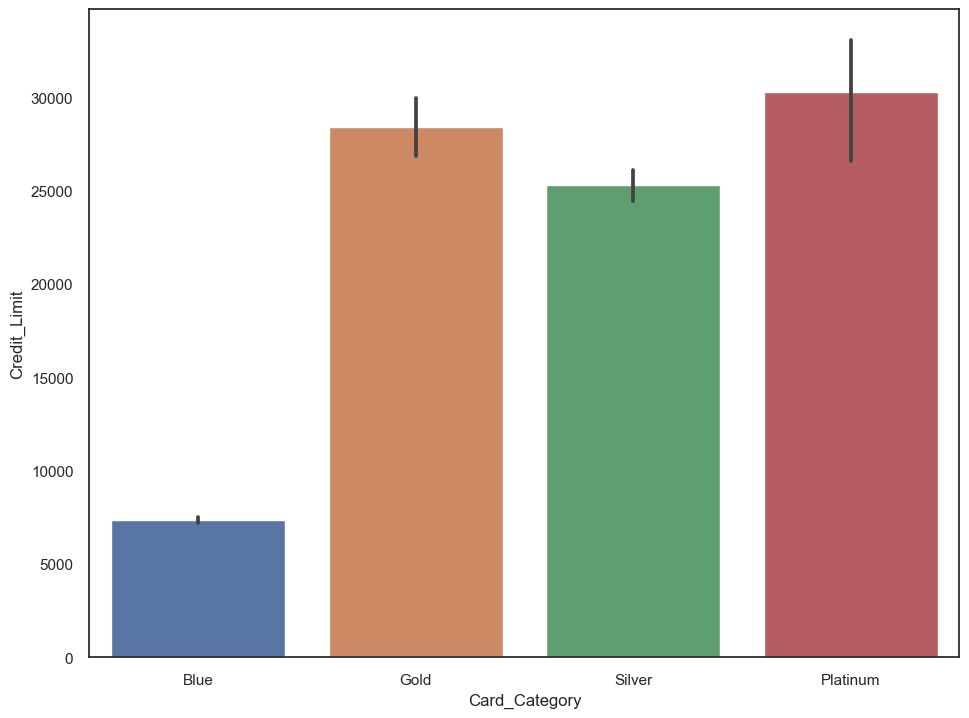

In [49]:
# barplot - card limit and card category 
# credit limit with decrease in credit limit is Platinum, Gold, Silver and Blue
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Card_Category',y = 'Credit_Limit')
plt.show()
plt.close()

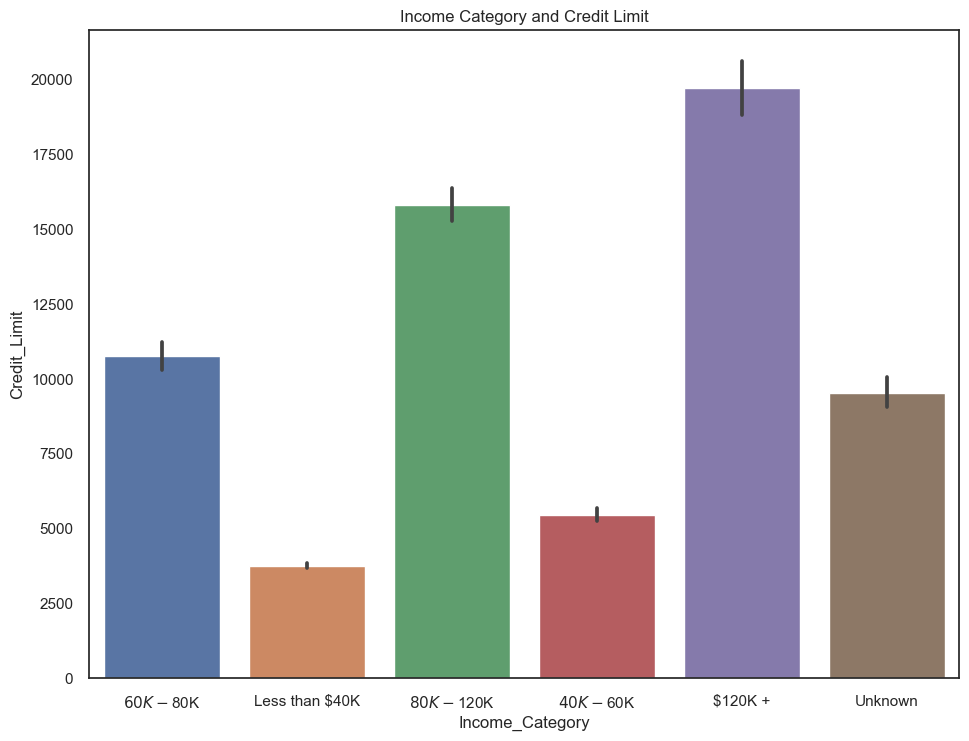

In [50]:
# barplot - income category and credit limit
# see credit limit with income category
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Income_Category',y = 'Credit_Limit')
plt.title("Income Category and Credit Limit")
plt.show()
plt.close()